# Rastrigin Function

### Definitions and functions

In [1]:
# Imports
import random
import math
import matplotlib.pyplot as plt
import copy

In [2]:
# Implements a Rastrigin function with cache
def rastrigin (x):
    global computationalBudgetUsage
    global rastriginCache
    
    # This cache was implemented to reduce computational budget usage
    if str(x) in rastriginCache.keys():
        return rastriginCache[str(x)]
    
    computationalBudgetUsage = computationalBudgetUsage + 1
    f = 10 * len(x)
    for i in range(len(x)):
        f = f + math.pow (x[i],2) - 10 * math.cos(2 * math.pi * x[i])
    
    rastriginCache[str(x)] = f    
    return f

In [3]:
# Binary to Gray
def binaryToGray (binary):
    gray = [0]*len(binary)
    gray[0] = binary[0]
    for i in range(1, len(binary)):
        gray[i] = str(int(binary[i-1]) ^ int(binary[i]))
    return gray

In [4]:
# Gray to Binary
def grayToBinary (gray):
    binary = [0]*len(gray)
    binary[0] = gray[0]
    for i in range(1, len(gray)):
        binary[i] = str(int(binary[i-1]) ^ int(gray[i]))
    return binary

In [5]:
# Float to Binary
def floatToBinary (aFloat):   
    deltax = (variableLimitsMax - variableLimitsMin) / ( math.pow(2, bitsResolution) - 1 )
    valueScaled = int ((aFloat - variableLimitsMin) / deltax)
    valueBinary = (format(int(valueScaled), 'b')).zfill(bitsResolution)
    return valueBinary

In [6]:
# Binary to Float
def binaryToFloat (binary):
    k = 0
    for j in range(bitsResolution):
        k = k + int(binary[j]) * math.pow(2, bitsResolution - j - 1)
    floatValue = variableLimitsMin + (variableLimitsMax - variableLimitsMin) * ( k / (math.pow(2, bitsResolution) - 1) )
    return floatValue

In [7]:
# Create a random individual
def randomIndividual():
    return ''.join(random.choice(['0','1']) for x in range(bitsResolution*variablesNumber))

In [8]:
# Get the number of a individual for the rastrigin function
def getNumbers(individual):
    numbersList = []
    splitlen = -(-len(individual) // variablesNumber)
    for number in ( [individual[ind:ind+splitlen] for ind in range(0, len(individual), splitlen)] ):
        binNumber = grayToBinary(number)
        numbersList.append (binaryToFloat(binNumber))
    return numbersList

In [9]:
# Function that returns the fitness according to rastrigin
def fitness(individual):
    return rastrigin(getNumbers(individual))

In [10]:
# Tournament selection
def tournament(population, k):
    candidate1 = copy.deepcopy(population[random.randrange(len(population))])
    for i in range(k):
        while True:
            candidate2 = copy.deepcopy(population[random.randrange(len(population))])
            if candidate1 != candidate2:
                break
    if fitness(candidate2) > fitness(candidate1):
        return candidate2
    else:
        return candidate1

In [11]:
# Roulette wheel
def rouletteWheel(population):
    # Create roulette
    roulette = []
    totalFitness = 0
    maxFitness = fitness(population[0])
    for i in range(len(population)):
        if fitness(population[i]) > maxFitness:
            maxFitness = fitness(population[i])
    maxFitness = maxFitness + 1
    for i in range(len(population)):
        totalFitness = totalFitness + (maxFitness - fitness(population[i]))
    roulettePoint = 0
    for i in range(len(population)):
        roulette.append ( ((maxFitness - fitness(population[i]))/totalFitness) + roulettePoint )
        roulettePoint = roulette[i]
    return roulette

In [12]:
# Roulette wheel selection
def rouletteWheelSelection(population, roulette):
    randRoulette = random.random()
    for i in range(len(population)):
        if roulette[i] > randRoulette:
            return copy.deepcopy(population[i])

In [13]:
# Crossover
def crossover(parent1, parent2, numberOfCuts):
    cuts = []
    for i in range(numberOfCuts):
        cuts.append(random.randrange(len(parent1)))
    cuts.sort()
    
    child1 = parent1[0:cuts[0]]
    child2 = parent2[0:cuts[0]]
    for i in range(1, numberOfCuts):
        if i % 2 == 0:
            child1 = child1 + parent1[cuts[i-1]:cuts[i]]
            child2 = child2 + parent2[cuts[i-1]:cuts[i]]
        else:
            child1 = child1 + parent2[cuts[i-1]:cuts[i]]
            child2 = child2 + parent1[cuts[i-1]:cuts[i]]
    
    
    if numberOfCuts % 2 == 0:
        child1 = child1 + parent1[cuts[numberOfCuts-1]:]
        child2 = child2 + parent2[cuts[numberOfCuts-1]:]
    else:
        child1 = child1 + parent2[cuts[numberOfCuts-1]:]
        child2 = child2 + parent1[cuts[numberOfCuts-1]:]
    
    return child1, child2

In [14]:
# Sort population
def sortPopulation(population):
    population.sort(key=lambda x: fitness(x), reverse=False)
    return population

In [15]:
# Mutation flip bit
def mutateFlipBit(individual):
    individualList = list(individual)
    for flips in range(random.randrange(maxNumberOfRandFlips)):
        randFlip = random.randrange(len(individual))
        if individualList[randFlip] == '0':
            individualList[randFlip] = '1'
        else:
            individualList[randFlip] = '0'
    newIndividual = ''.join(individualList)
    return copy.deepcopy(newIndividual)

In [16]:
# Definitions
rastriginVariables = 10
bitsResolution = 10
variablesNumber = 10
variableLimitsMin = -5.12
variableLimitsMax = 5.12
halfPopulationSize = 100 # Half population of a generation
generations = 1000 # How many generations
tournamentRounds = 1 # Rounds of tournament selection
crossOverCutofPoints = 10
chanceToMutate = 0.4 # Probability to mutate
maxNumberOfRandFlips = 5 # How many positions can be fliped
computationalBudget = 10000 # The computational budget is 10,000 fitness function evaluations.

selectBest = 0.9 # Next generation selection "Best"
selectTournament = 0.1 # Next generation selection "Tournament"
selectRandom = 0 # Next generation selection "Generate Random"

### Main program

In [17]:
# Generate half initial random population
# Phenotype representation as binary
population = []
for individual in list(range(halfPopulationSize)):
    population.append(randomIndividual())

In [18]:
# Main generations loop
genFitnessLog = []
computationalBudgetUsage = 0
rastriginCache = {}
actualCrossOverCutofPoints = crossOverCutofPoints
actualChanceToMutate = chanceToMutate
random.seed()

for gen in range(generations):
    
    # Check if we still have budget
    if computationalBudgetUsage + halfPopulationSize > computationalBudget:
        break
    
    # Create roulette whell for population
    roulette = rouletteWheel(population)
    
    # Crossover population until it reaches full size
    while len(population) <  + halfPopulationSize * 2:
        parent1 = ''
        parent2 = ''
        
        if random.random() < 0.5:
            parent1 = tournament(population, tournamentRounds)
        else:
            parent1 = rouletteWheelSelection(population, roulette)
        
        if random.random() < 0.5:
            parent2 = tournament(population, tournamentRounds)
        else:
            parent2 = rouletteWheelSelection(population, roulette)
        
        child1, child2 = crossover(parent1, parent2, actualCrossOverCutofPoints)
        population.append(child1)
        population.append(child2)

    # Mutate some individuals
    for i in range(len(population)):
        if random.random() <= actualChanceToMutate:
            population[i] = mutateFlipBit(population[i])

    # Sort population according to fitness
    population = sortPopulation(population)

    # Print generation fitness
    genFitness = fitness(population[0])
    genFitnessLog.append(genFitness)
    #print('Gen %i fitness 0=%.4f (Budget %i)' %(gen, genFitness, computationalBudgetUsage))

    # Next generation
    newPopulation = []
    # Keep some of the best
    for i in range(int(halfPopulationSize * selectBest)):
        newPopulation.append((population[i]))
    # Use tournament to get some more
    for i in range(int(halfPopulationSize * selectTournament)):
        newPopulation.append((tournament(population, tournamentRounds)))
    # Generate some randoms
    for i in range(int(halfPopulationSize * selectRandom)):
        newPopulation.append((randomIndividual()))
    
    # Decay parameters
    actualCrossOverCutofPoints = 1 + int(crossOverCutofPoints - ((computationalBudgetUsage / computationalBudget) * crossOverCutofPoints / 2) )
    actualChanceToMutate = (chanceToMutate - ((computationalBudgetUsage / computationalBudget ) / 3) )
    
    population = newPopulation    

Found a Rastrigin solution with fitness 2.1730 on generation 82
---
x* = 0.9960 0.0050 -0.0250 -0.0050 0.0050 -1.0060 0.0050 -0.0050 -0.0050 0.0050 
f* = 2.1730
Total number of calls (or evaluations) of the fitness function: 9906
---


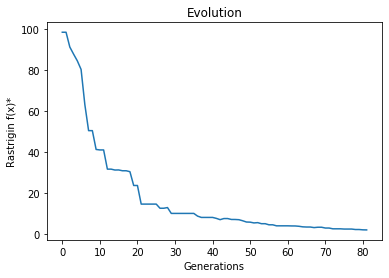

In [19]:
# Show results
print('Found a Rastrigin solution with fitness %.4f on generation %i' %(fitness(population[0]), len(genFitnessLog)))
print('---')
print("x* = " + "%.4f "*len(getNumbers(population[0])) % tuple(getNumbers(population[0])))
print("f* = %.4f" %(rastrigin(getNumbers(population[0]))) )
print("Total number of calls (or evaluations) of the fitness function: %i" %computationalBudgetUsage)
print('---')
# Plot evolution
plt.plot(genFitnessLog)
plt.title('Evolution')
plt.ylabel('Rastrigin f(x)*')
plt.xlabel('Generations')
plt.show()

### Comments

#### The algorithm is an implementation of a mono objective genetic algorithm and is explained through the comments I put along the code. The algorithm seeks to minimize the function until it consumes the entire computational budget defined (there is a margin to prevent it from exceeding consumption). To avoid unnecessary budget consumption, I implemented a cache that stores the calculated results for each individual and does not evaluate the Rastrigin function when the result is already known. I noticed that it was necessary to reduce the mutation percentage parameters and crossover cutoff points as the budget was consumed, since, although useful at first, they were causing too much disturbance in the model and, after implementation, the result arrived closer to the minimum. The algorithm tries to find values of x* where f* are close to 2 and 3 most of the time, but it fails to reach the global minimum of f* = 0. I believe that, to reach the global minimum, the genetic algorithm should be allied with a local search engine.